In [1]:
import os
import random
import sqlite3
import datetime

import numpy as np
import pandas as pd

In [2]:
con_pharma = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb.sqlite"))

In [3]:
tweet_df = pd.read_sql_query(f"SELECT * from tweets_count", con_pharma)

In [4]:
len(tweet_df['tweetDate'].unique())

723

In [5]:
tweet_df.describe()

,count
count,70492.000000
mean,4.928190
std,41.495517
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,8271.000000


<AxesSubplot:>

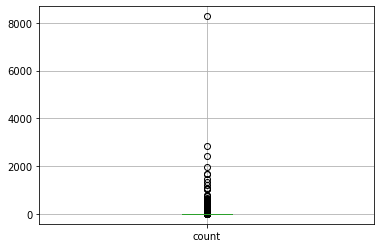

In [6]:
tweet_df.boxplot()

In [17]:
tweet_df = pd.read_sql_query(f"SELECT * from tweets_count WHERE count >= 5 AND count <= 50", con_pharma)

In [18]:
tweet_df.describe()

,count
count,16209.000000
mean,11.425381
std,6.510859
min,5.000000
25%,9.000000
50%,10.000000
75%,10.000000
max,50.000000


<AxesSubplot:>

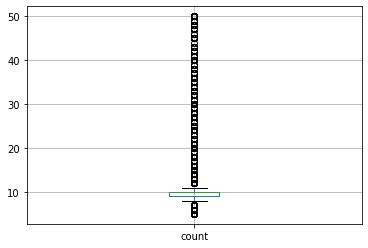

In [19]:
tweet_df.boxplot()

In [23]:
tweet_df['count'] = tweet_df['count'].apply(lambda x: 12 if x > 12 else x) 

In [24]:
tweet_df.describe()

,count
count,16209.000000
mean,9.471960
std,1.894124
min,5.000000
25%,9.000000
50%,10.000000
75%,10.000000
max,12.000000


<AxesSubplot:>

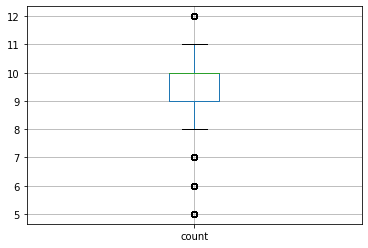

In [25]:
tweet_df.boxplot()

In [97]:
len(tweet_df['tweetDate'].unique())

773

In [111]:
def write_to_db(con, df):
    cursor = con.cursor()
    
    try:
        cursor.execute('''CREATE TABLE IF NOT EXISTS reduced_tweet_counts (
              category TEXT, 
              tweetDate DATE, 
              count INTEGER, 
              tweet TEXT, 
              CONSTRAINT uniq_val PRIMARY KEY (category, tweetDate, tweet))''')
        con.commit()
        
        df.to_sql('reduced_tweet_counts', con, if_exists='replace', index=False)
        con.commit()
        
    except sqlite3.Error as error:
        print({error})
    
    finally:
        cursor.close()
        con.close()

In [112]:
write_to_db(con_pharma, tweet_df)